In [1]:
import pandas as pd
import numpy as np
from fastai.tabular import *
import pickle

In [3]:
if os.path.getsize('/home/anshch/Documents/data_2.pkl') > 0:      
    with open('/home/anshch/Documents/data_2.pkl', "rb") as f:
        unpickler = pickle.Unpickler(f)
        # if file is not empty scores will be equal
        # to the value unpickled
        data = unpickler.load()
        
data = data.reset_index()
data.head()

,index,date_block_num,shop_id,item_id,item_cnt_month,city_code,shop_category,item_category_id,type_code,subtype_code,...,delta_price_lag,delta_revenue_lag_1,month,days,item_shop_last_sale,item_last_sale,item_shop_first_sale,item_first_sale,weeknd_count,days_in_month
0,4488756,12,2,27,0.0,0,1,19,5,10,...,-0.282715,1.211914,0,31,1,1,12,12,4,31
1,4488757,12,2,30,0.0,0,1,40,11,4,...,-0.483398,1.211914,0,31,1,1,11,11,4,31
2,4488758,12,2,31,0.0,0,1,37,11,1,...,-0.137451,1.211914,0,31,1,1,11,11,4,31
3,4488759,12,2,32,1.0,0,1,40,11,4,...,-0.407227,1.211914,0,31,-1,1,12,12,4,31
4,4488760,12,2,33,1.0,0,1,37,11,1,...,-0.225464,1.211914,0,31,1,1,12,12,4,31


In [4]:
# Select columns

data = data[[
    'date_block_num',
    'shop_id',
    'shop_category',
    'item_id',
    'item_cnt_month',
    'city_code',
    'item_category_id',
    'type_code',
    'subtype_code',
    'item_cnt_month_lag_1',
    'item_cnt_month_lag_2',
    'item_cnt_month_lag_3',
    'item_cnt_month_lag_4',
    'item_cnt_month_lag_5',
    'item_cnt_month_lag_6',
    'item_cnt_month_lag_12',
    'date_avg_item_cnt_lag_1',
    'date_item_avg_item_cnt_lag_1',
    'date_item_avg_item_cnt_lag_2',
    'date_item_avg_item_cnt_lag_3',
    'date_item_avg_item_cnt_lag_6',
    'date_item_avg_item_cnt_lag_12',
    'date_shop_avg_item_cnt_lag_1',
    'date_shop_avg_item_cnt_lag_2',
    'date_shop_avg_item_cnt_lag_3',
    'date_shop_avg_item_cnt_lag_6',
    'date_shop_avg_item_cnt_lag_12',
    'date_cat_avg_item_cnt_lag_1',
    'date_shop_cat_avg_item_cnt_lag_1',
    'date_shop_type_avg_item_cnt_lag_1',
    'date_shop_subtype_avg_item_cnt_lag_1',
    'date_city_avg_item_cnt_lag_1',
    'date_item_city_avg_item_cnt_lag_1',
    'date_type_avg_item_cnt_lag_1',
    'date_subtype_avg_item_cnt_lag_1',
    'delta_price_lag',
    'month',
    'item_shop_last_sale',
    'item_last_sale',
    'item_shop_first_sale',
    'item_first_sale',
    'city_coord_1',
    'city_coord_2',
    'country_part',
    'weeknd_count',
    'days_in_month'
]]

In [5]:
data["log_sales"] = np.log(data.item_cnt_month + 1)
data["log_sales"].describe()

count    6.639294e+06
mean              NaN
std      0.000000e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      3.044922e+00
Name: log_sales, dtype: float64

In [8]:
# Split data

X_train = data[data.date_block_num <= 33]
X_train = data[data.item_cnt_month>0]
X_train = X_train.reset_index(drop=True)
# X_valid = data[data.date_block_num == 33]
X_test = data[data.date_block_num == 34]

In [9]:
#Start index for creating a validation set from train_data
start_indx = X_train[X_train.date_block_num == 33].index[0]

#End index for creating a validation set from train_data
end_indx = max(X_train[X_train.date_block_num == 33].index)
print(start_indx, end_indx)

887869 919339


In [10]:
# Clean env
import gc

del data
gc.collect()

20

In [11]:
# Define feature type
path = ''

dep_var = 'log_sales'

cat_feature = ["shop_id", "shop_category", "item_id", "city_code", "item_category_id", 
               "type_code", "subtype_code", 'month', "country_part"]

con_feature = ['item_cnt_month_lag_1', 'item_cnt_month_lag_2','item_cnt_month_lag_3',
               'item_cnt_month_lag_4', 'item_cnt_month_lag_5', 'item_cnt_month_lag_6', 
               'item_cnt_month_lag_12', 'date_avg_item_cnt_lag_1', 'date_item_avg_item_cnt_lag_1', 
               'date_item_avg_item_cnt_lag_2', 'date_item_avg_item_cnt_lag_3', 'date_item_avg_item_cnt_lag_6', 
               'date_item_avg_item_cnt_lag_12', 'date_shop_avg_item_cnt_lag_1', 'date_shop_avg_item_cnt_lag_2', 
               'date_shop_avg_item_cnt_lag_3', 'date_shop_avg_item_cnt_lag_6', 'date_shop_avg_item_cnt_lag_12', 
               'date_cat_avg_item_cnt_lag_1', 'date_shop_cat_avg_item_cnt_lag_1', 
               'date_shop_type_avg_item_cnt_lag_1', 'date_shop_subtype_avg_item_cnt_lag_1', 
               'date_city_avg_item_cnt_lag_1', 'date_item_city_avg_item_cnt_lag_1', 
               'date_type_avg_item_cnt_lag_1', 'date_subtype_avg_item_cnt_lag_1', 'delta_price_lag', 
               'item_shop_last_sale', 'item_last_sale','item_shop_first_sale', 
               'item_first_sale', 'city_coord_1', 'city_coord_2', 'weeknd_count', 'days_in_month']

In [12]:
#List of Processes/transforms to be applied to the dataset
procs = [FillMissing, Categorify, Normalize]

In [13]:
X_train[con_feature] = X_train[con_feature].astype('int64')
X_test[con_feature] = X_test[con_feature].astype('int64')

In [14]:
#TabularList for Validation
val = (TabularList.from_df(X_train.iloc[start_indx:end_indx].copy(), path=path, cat_names=cat_feature, cont_names=con_feature))

test = (TabularList.from_df(X_test, path=path, cat_names=cat_feature, cont_names=con_feature, procs=procs))

#TabularList for training
data = (TabularList.from_df(X_train, path=path, cat_names=cat_feature, cont_names=con_feature, procs=procs)
                           .split_by_idx(list(range(start_indx,end_indx)))
                           .label_from_df(cols=dep_var)
                           .add_test(test)
                           .databunch())

In [ ]:
#Display the data batch
data.show_batch(rows = 5)

In [28]:
#Initializing the network
learn = tabular_learner(data, layers=[1024,512], metrics= [rmse,r2_score])

epoch,train_loss,valid_loss,root_mean_squared_error,r2_score,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


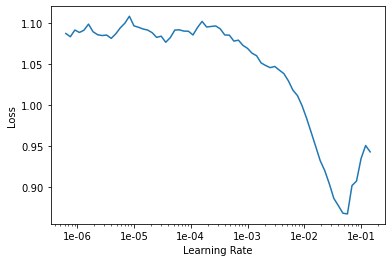

In [29]:
#Exploring the learning rates
learn.lr_find()
learn.recorder.plot()

In [30]:
#Exploring the learning rates
learn.fit_one_cycle(10, 1e-02)

epoch,train_loss,valid_loss,root_mean_squared_error,r2_score,time
0,0.103995,0.128312,0.339422,0.217293,22:21
1,0.098631,22.126545,0.707391,-57.347584,30:00
2,0.106625,53.242039,1.799101,-234.567261,36:27
3,0.100854,1263.298828,10.103081,-7392.806641,32:00
4,0.093642,534.405701,6.167455,-2137.737793,34:45
5,0.091331,23.268612,1.236051,-64.064186,35:31
6,0.086727,161.337875,4.144195,-907.515137,32:15
7,0.085854,4.016992,0.619183,-7.642233,35:48
8,0.077485,1.121025,0.538899,-3.809426,36:16
9,0.069876,4.381352,0.737071,-14.537975,36:40


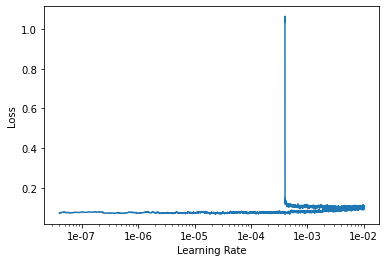

In [31]:
learn.recorder.plot()

In [32]:
#Getting The Training And Validation Errors
tr = learn.validate(learn.data.train_dl)
va = learn.validate(learn.data.valid_dl)
print("The Metrics used In Evaluating The Network:", str(learn.metrics))
print("\nThe calculated RMSE & R-Squared For The Training Set :", tr[1:])
print("\nThe calculated RMSE & R-Squared For The Validation Set :", va[1:])

The Metrics used In Evaluating The Network: [<function root_mean_squared_error at 0x7f01b3af97b8>, <function r2_score at 0x7f01b3af9950>]

The calculated RMSE & R-Squared For The Training Set : [tensor(0.6585), tensor(-116.2380)]

The calculated RMSE & R-Squared For The Validation Set : [tensor(0.7371), tensor(-14.5380)]


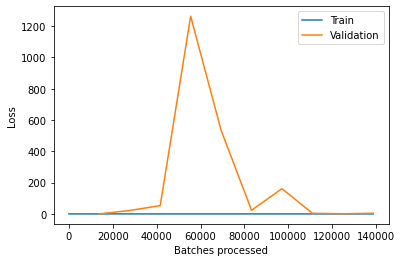

In [33]:
#Plotting The losses for training and validation
learn.recorder.plot_losses()

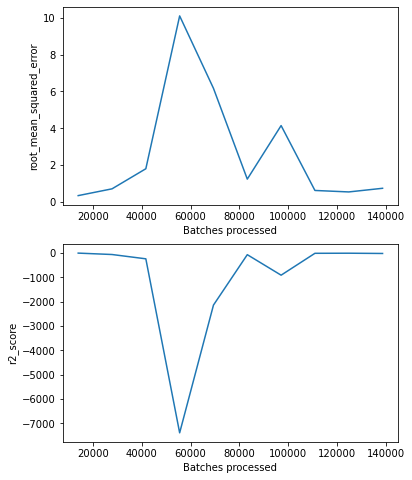

In [34]:
#Plotting the metrics of evaluation
learn.recorder.plot_metrics()

In [35]:
#Predicting For The Complete Test set
test_predictions = learn.get_preds(ds_type=DatasetType.Test)[0]
#Converting the tensor output to a list of predicted values
test_predictions = [i[0] for i in test_predictions.tolist()]

In [36]:
if os.path.getsize('/home/anshch/Documents/test.pkl') > 0:      
    with open('/home/anshch/Documents/test.pkl', "rb") as f:
        unpickler = pickle.Unpickler(f)
        # if file is not empty scores will be equal
        # to the value unpickled
        test = unpickler.load()
test.head()

,shop_id,item_id,date_block_num
ID,,,
0,5,5037,34
1,5,5320,34
2,5,5233,34
3,5,5232,34
4,5,5268,34


In [37]:
submission = pd.DataFrame({
    "ID": test.index, 
    "item_cnt_month": np.exp(test_predictions)-1
})
# submission[submission < 0] = 0
submission.to_csv('/home/anshch/Documents/fastai_nn.csv', index=False)